# Lab 01: Dealing with Spatial Data in Python
In this tutorial, we will work on dealing with general non-spatial and spatial data using the Python library pandas and geopandas. Many concepts/techniques will be echoed to the ones your learned from [](lecture02). 

To follow this tutorial, you should have installed [Jupyter Notebook](https://jupyter.org/install) (or Jupyter Lab) on your own computer (note: computers in the lab should have already installed it).  

Requred packages include:
- [pandas](https://pandas.pydata.org/docs/getting_started/install.html) / [geopandas](https://geopandas.org/en/stable/getting_started/install.html)
- [shapely](https://pypi.org/project/Shapely/)
- [pysal](https://pysal.org/docs/install/)
- [pyproj](https://pypi.org/project/pyproj/)
- [osmnx](https://osmnx.readthedocs.io/en/stable/) / [pyrosm](https://pyrosm.readthedocs.io/en/latest/installation.html)
- [matplotlib](https://pypi.org/project/matplotlib/) (visualization)

Mostly, you can use the commond like `pip install pandas` to install the package

## Basics in Pandas (for non-spatial data)
Pandas is currently the mostly important tool for data scientists working in Python. It is the backbone of many state-of-the-art techniques like machine learning and visualization. Here we cover the basics of using Pandas. For more comprehensive tutorial, follow [this video](https://www.youtube.com/watch?v=5rNu16O3YNE) and [this post](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

First of all, the two key components in Pandas are `Series` and `DataFrame`. A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of `Series`. These two components are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

![Series and DataFrame](lab1-fig1.png)

### Create dataframe from scratch 
There are many ways to create a DataFrame from scratch, but a great option is to just use a simple `dict` (this is a common data structure called dictionary, which is composed by a key:value pair). Each key:value item in data corresponds to a column in the resulting DataFrame.

Let's say we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:

In [6]:
import pandas as pd
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


The Index of this DataFrame was given to us as the numbers 0-3. We could also create our own when we initialize the DataFrame.

In [7]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


So now we could locate a customer's order by using their name:

In [8]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

### Loading data 
We can also load in data from data formats like `csv`, `json`, `txt`, and so on. For example, if you downloaded `purchase.csv` to your local directory, you should be able to load the data by running:

In [11]:
purchases_loaded = pd.read_csv('purchase.csv')
purchases_loaded

,Unnamed:0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


Note here that CSVs don't have indexes like DataFrames, so we need to designate the `index_col` when reading:

In [12]:
purchases_loaded = pd.read_csv('purchase.csv', index_col=0)
purchases_loaded

,apples,oranges
Unnamed:0,,
June,3,0
Robert,2,3
Lily,0,7
David,1,2


### Viewing your data
There are many operations to view/describe your data. For example, you can use `.head()` to check the first several rows of your dataframe, `.tail()` to see the last severl rows, `.info()` to have a list of information about your dataframe (you should always run it first after your data is loaded), `.shape` to see the dimension of your dataframe (i.e., how many rows and columns are there?), etc. Let's try `.info()` here and you should also try the others yourself. 

In [13]:
purchases_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, June to David
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   apples   4 non-null      int64
 1   oranges  4 non-null      int64
dtypes: int64(2)
memory usage: 96.0+ bytes


From the output, you can see our loaded `purchases_loaded` dataframe has 4 entries (rows), and there are two columnes, each has 4 non-null values and their data types are both int64 (i.e., integer with 64 digits). Data type here is an important concept (we have covered it in our lecture as well). Different data types might have various operations/analysis. See below table for a full list of data types in Pandas, and Python and NumPy (another important package in Python).  

![dtype_pandas](lab1-fig2.png)

### Querying (selecting, slicing, extracting) Dataframe
Similar to the complex DBMS, Pandas also support selecting, slicing or extracting data from the `Dataframe`. 
#### Select by column 
We can extract a column using square brackets like this:

In [17]:
purchases_apple = purchases_loaded['apples']
purchases_apple

Unnamed:0
June       3
Robert     2
Lily       0
David      1
Name: apples, dtype: int64

In [18]:
type(purchases_apple)

pandas.core.series.Series

Notice that the returned `purchases_apple` is a `Series`. To extract a column as a `DataFrame`, we need to pass a list of column names. In our case that's just a single column:

In [19]:
purchases_apple = purchases_loaded[['apples']]
type(purchases_apple)

pandas.core.frame.DataFrame

#### Select by row 
For rows, we can use two ways to extract data:
- `loc`: locates by name
- `iloc`: locates by numerical index

For example, we can select the row of June (how many apples and oranges June has got?) from our `purchase_loaded` dataframe. 

In [23]:
purchases_June = purchases_loaded.loc["June"]
purchases_June

apples     3
oranges    0
Name: June, dtype: int64

#### Conditional selection 
So far, We’ve gone over how to select columns and rows, but what if we want to make a conditional selection?

For example, what if we want to filter our `purchases_loaded` DataFrame to show only people who bought apples less than 2?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [25]:
condition = (purchases_loaded['apples'] < 2)
condition

Unnamed:0
June       False
Robert     False
Lily        True
David       True
Name: apples, dtype: bool

A little bit more complex, how about showing people who bought apples less than 2 but oranges larger than 2? Can you try it? Hint, you need to use the logic operator `&` to connect two conditions. 

## GeoPandas for Spatial Data
`Geopandas` is designed to process spatial data in Python. `Geopandas` combines the capabilities of the data analysis library `pandas` with other packages like `shapely` and `fiona` for managing spatial data. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrame` from `pandas`.

The key difference between `GeoDataFrame` and pandas `DataFrame` is that a `GeoDataFrame` should contain at least one column for geometries. By default, the name of this column is `'geometry'`. The geometry column is a `GeoSeries` which contains the geometries (points, lines, polygons, multipolygons etc.) as `shapely` objects.

### Loading spatial data 
Spatial data that are in the format of geojson, shp, etc. can all be loaded as GeoPandas Dataframe by using the function `read_file()`. Let's use a shapefile (shp) downloaded from [OpenStreetMap](http://download.geofabrik.de/) as an example here. You can also find the specific data (building in Bristol) from Blackboard.  

In [36]:
import geopandas as gpd

# Filepath
bristol_building_file = "./bristol-buildings.shp/gis_osm_buildings_a_free_1.shp" # make sure the directory is correct in your case

# Read the file
bristol_building = gpd.read_file(bristol_building_file)

# How does it look?
bristol_building.head()

,osm_id,code,fclass,name,type,geometry
0,4309554,1500,building,Bristol City Hall,None,"POLYGON ((-2.60242 51.45242, -2.60241 51.45244..."
1,4315318,1500,building,Clifton Cathedral,church,"POLYGON ((-2.61673 51.45965, -2.61673 51.45965..."
2,4315809,1500,building,Clifton Down Shopping Centre,retail,"POLYGON ((-2.61133 51.46431, -2.61070 51.46441..."
3,4317900,1500,building,Za Za Bazaar,None,"POLYGON ((-2.59869 51.45029, -2.59865 51.45042..."
4,4317901,1500,building,Mackenzies Café Bar,commercial,"POLYGON ((-2.59851 51.45107, -2.59850 51.45110..."


As we can see, the `GeoDataFrame` `bristol_building` contains various attributes in separate columns. The `geometry` column contains the spatial information (it is [WKT format](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry), which is implemented by `shapely`). We can next take a look of some of the basic information of `bristol_building` using the command: 

In [37]:
bristol_building.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 149805 entries, 0 to 149804
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   osm_id    149805 non-null  object  
 1   code      149805 non-null  int64   
 2   fclass    149805 non-null  object  
 3   name      7587 non-null    object  
 4   type      98915 non-null   object  
 5   geometry  149805 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 6.9+ MB


What kind of information can you get from this output?

Since our data is intrinsically spatial (it has a `geometry` column), we can visualize it to understand the spatial distribution of the data better. `plot()` is the function for it:

<AxesSubplot:>

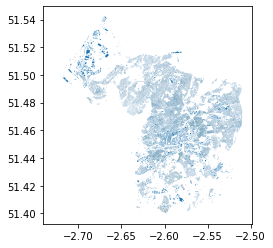

In [39]:
bristol_building.plot()

### Saving spatial data
Once you are done with your process/analysis, you can also save your GeoDataFrame into files (e.g., `.shp`, `.geojson`, etc). Here, since we loaded data from `.shp`, let's now try to save our data to `.geojson`:

In [40]:
bristol_building.to_file('osm_bristol_buildings.geojson', driver='GeoJSON') 
## this will save your data to the current directory same to this notebook. 
## you can check the current directory by ruing cwd = os.getcwd()

### Retrieving data directly from OSM
We have so far seen how to read spatial data from disk (i.e., the data is downloaded and saved on your local directory). Next, let’s see how we can retrieve data from OSM directlt using a library called `pyrosm`. With `pyrosm`, you can easily retrieve data from anywhere in the world based on `OSM.PBF` (a specific data format for OSM) files that are distributed by [Geofabrik](http://download.geofabrik.de/) (this is where the Bristol buildings data were downloaded). The package aims to be an efficient way to parse OSM data covering large geographical areas (such as countries and cities)

Note that if you would like to be flexible about your download, e.g., selecting a bounding box by yourself rather than by administrative regions, you can consider using [`OSMnx`](https://osmnx.readthedocs.io/en/stable/) library. 

In [42]:
from pyrosm import OSM, get_data

# Download data for Bristol
bristol = get_data("bristol")

# Initialize the reader object for Bristol
osm = OSM(bristol)

Downloaded Protobuf data 'Bristol.osm.pbf' (22.91 MB) to:
'/var/folders/xg/5n3zc4sn5hlcg8zzz6ysx21m0000gq/T/pyrosm/Bristol.osm.pbf'


In the first command, we downloaded the data for “Bristol” using the `get_data` function. This function in fact automates the data downloading process and stores the data locally in a temporary folder. The next step was to initialize a reader object called `osm`. The `OSM()` function takes the filepath to a given osm.pbf file as an input. Notice that at this point we actually didn’t yet read any data into `GeoDataFrame`.

OSM contains a lot of information about the world, which is contributed by citizens like you and me. In principle, we can retrieve information under various themes from OSM using the following functions. 

- road networks –> `osm.get_network()`

- buildings –> `osm.get_buildings()`

- Points of Interest (POI) –> `osm.get_pois()`

- landuse –> `osm.get_landuse()`

- natural elements –> `osm.get_natural()`

- boundaries –> `osm.get_boundaries()`

Here, let's extract the road network at Bristol from OSM:

In [43]:
bristol_roadnetwork = osm.get_network()
bristol_roadnetwork.head()

,access,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,junction,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,None,None,None,None,None,secondary,None,...,None,None,None,190,0,-1,"{""bus_name"":""Chew Valley Explorer"",""route"":""bus""}",way,"MULTILINESTRING ((-2.60972 51.36571, -2.60955 ...",184.0
1,None,None,None,None,None,None,None,None,unclassified,None,...,None,None,None,193,0,-1,None,way,"MULTILINESTRING ((-2.61912 51.36762, -2.61940 ...",55.0
2,None,yes,None,None,None,None,None,None,unclassified,None,...,None,None,None,196,0,-1,None,way,"MULTILINESTRING ((-2.60464 51.37130, -2.60449 ...",1957.0
3,None,None,None,None,None,None,None,None,primary,None,...,None,None,None,209,0,-1,"{""maxweight"":""7.5"",""maxweight:conditional"":""no...",way,"MULTILINESTRING ((-2.36077 51.38521, -2.36083 ...",91.0
4,None,None,None,None,None,None,None,None,primary,None,...,None,None,None,210,0,-1,"{""maxweight"":""7.5"",""maxweight:conditional"":""no...",way,"MULTILINESTRING ((-2.36347 51.38456, -2.36342 ...",85.0


We can get the lenth of this DataFrame (how many road network do we have in Bristol?) and some basic descritions of it by running:

In [44]:
len(bristol_roadnetwork) 

96693

In [46]:
bristol_roadnetwork.describe() # note that it only provide a statistical summary for columns whoes data type is numeric

,id,timestamp,version,length
count,9.669300e+04,96693.0,96693.0,96693.000000
mean,4.113229e+08,0.0,-1.0,111.388249
std,3.477955e+08,0.0,0.0,198.521158
min,1.900000e+02,0.0,-1.0,0.000000
25%,7.761732e+07,0.0,-1.0,21.000000
50%,3.105967e+08,0.0,-1.0,50.000000
75%,7.190331e+08,0.0,-1.0,114.000000
max,1.097824e+09,0.0,-1.0,7571.000000


Likewise, we can also plot it. Please try it yourself. 

### Coordinate Reference System for GeoDataFrame
Another difference between `GeoDataFrames` and `DataFrames` is that the former has intrinsic coordinate reference system (CRS) as it has the `geometry` column. To check this information, we can call its attribute `crs`:

In [47]:
bristol_roadnetwork.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

It shows that coordinates in `geometry` column are using the WGS 84 with a EPSG code 4326. In fact, it is the mostly used coordinate reference system (CRS) in spatial data science as it is a global coordinate system and has been used for GPS as well. However, as we covered in the lecture, those global CRSs are not that accurate for local regions. For the UK, or Bristol, a more commonly used CRS is EPSG:27700 (National Grid for Great Britain), and this CRS is also projected. Let's then transfer `bristol_roadnetwork` from EPSG:4326 to EPSG:27700:

In [48]:
bristol_roadnetwork_reprojected = bristol_roadnetwork.to_crs(epsg=27700)
bristol_roadnetwork_reprojected.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

Now we have an projected CRS for the road network data in Bristol. To confirm the difference, let’s take a look at the geometry of the first row in our original road network `bristol_roadnetwork` and the projected `bristol_roadnetwork_reprojected`.

In [49]:
orig_geom = bristol_roadnetwork.loc[0, "geometry"]
projected_geom = bristol_roadnetwork_reprojected.loc[0, "geometry"]

print("Orig:\n", orig_geom, "\n")
print("Proj:\n", projected_geom)

Orig:
 MULTILINESTRING ((-2.6097212 51.3657117, -2.6095465 51.3656477), (-2.6095465 51.3656477, -2.6092646 51.3654812), (-2.6092646 51.3654812, -2.6088734 51.3653167), (-2.6088734 51.3653167, -2.6085088 51.3650842), (-2.6085088 51.3650842, -2.6083427 51.3649802), (-2.6083427 51.3649802, -2.6081261 51.3648105), (-2.6081261 51.3648105, -2.6078208 51.3645815)) 

Proj:
 MULTILINESTRING ((357648.823472627 163137.45959180896, 357660.9265108949 163130.24084904365), (357660.9265108949 163130.24084904365, 357680.3978917962 163111.560813186), (357680.3978917962 163111.560813186, 357707.480545406 163093.04007779417), (357707.480545406 163093.04007779417, 357732.64877296326 163066.97239782498), (357732.64877296326 163066.97239782498, 357744.11646257003 163055.31031830708), (357744.11646257003 163055.31031830708, 357759.0393570516 163036.31243119104), (357759.0393570516 163036.31243119104, 357780.08292435773 163010.6684798217))


As we be seen, the coordinates that form our road segments (MULTILINESTRING) has changed from `decimal degrees` to `meters`. Next, let's visualize it:

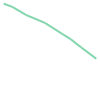

In [50]:
orig_geom

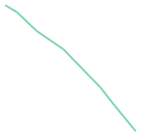

In [51]:
projected_geom

As you can see, the shape of the two road segments are quite different (e.g., the lenth, where the curve occures, etc.). This is exactly due to the difference between the two CRSs.  

It is also worth noting here, the data type, MultiLineString, of the variables `orig_geom` and `projected_geom` are defined by `shapely`. It enables us to conduct these kind of spatial operations and visializations. 

In [52]:
type(orig_geom)

shapely.geometry.multilinestring.MultiLineString

### Computation on GeoDataFrame
There are many operations embeded in GeoDataFrame that can be directly called to do some spatial computations. For example, we can get the area of buildings for our `bristol_building` dataframe:

In [53]:
bristol_building["building_area"] = bristol_building.area
bristol_building["building_area"].describe()

/var/folders/xg/5n3zc4sn5hlcg8zzz6ysx21m0000gq/T/ipykernel_98855/2251981216.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bristol_building["building_area"] = bristol_building.area


count    1.498050e+05
mean     1.341308e-08
std      6.657677e-08
min      5.667000e-11
25%      6.084315e-09
50%      7.575225e-09
75%      1.033238e-08
max      1.038017e-05
Name: building_area, dtype: float64

Here, you can see a warning that WGS is a geographic CRS, hence the results of area mighht not be accurate. Can you project the dataframe to a projected coordicate reference system (e.g.,EPSG:27700 in our case)? After your projection, do the area computation again. What do the results look like? What is the unit of the area?  

### Spatial join 
As we discussed in the lecture, joining tables using keys is a core operation for DBMS. Regarding spatial data, spatial join is somewhat similar to table join but with the operation being based on geometries.

In this tutorial, we will try to conduct a spatial join and merge information between two GeoDataFrames. First, let's read all restaurants (a type of Point of Interests (POI)) at Bristol from the OSM. Then, we combine information from restaurants to the underlying building (restaurants typically are within buildings). We will again use pyrosm for reading the data, but this time we will use the `get_pois()` function:

/Users/gy22808/opt/anaconda3/lib/python3.9/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


<AxesSubplot:>

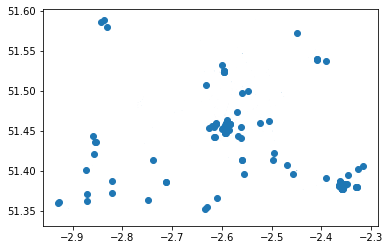

In [54]:
# Read Points of Interest (POI) using the same OSM reader object that was initialized earlier
# The custom_filter={"amenity": ["restaurant"]} indicates that we want only "restaurant", a type of POI
bristol_restaurants = osm.get_pois(custom_filter={"amenity": ["restaurant"]})
bristol_restaurants.plot()

In [55]:
bristol_restaurants.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   lat               138 non-null    float32 
 1   tags              610 non-null    object  
 2   timestamp         642 non-null    int64   
 3   changeset         139 non-null    float64 
 4   version           642 non-null    int8    
 5   lon               138 non-null    float32 
 6   id                642 non-null    int64   
 7   addr:city         482 non-null    object  
 8   addr:country      52 non-null     object  
 9   addr:housenumber  456 non-null    object  
 10  addr:housename    100 non-null    object  
 11  addr:postcode     590 non-null    object  
 12  addr:place        29 non-null     object  
 13  addr:street       549 non-null    object  
 14  email             24 non-null     object  
 15  name              641 non-null    object  
 16  opening_hours     

From the `info()`, we can see that there are 642 restaurants in Bristol according to OSM. Note. that OSM is a valunteered geographic information platform. So the quality, accuracy, and completness of the data might be low. 
Next, let's join data from `bristol_buildings` to the `bristol_restaurants` using `sjoin()` function from geopandas:

In [57]:
# Join information from buildings to restaurants
bristol_join = gpd.sjoin(bristol_restaurants, bristol_building)

# Print column names
print(bristol_join.columns)

# Show rows
bristol_join

Index(['lat', 'tags', 'timestamp', 'changeset', 'version', 'lon', 'id',
       'addr:city', 'addr:country', 'addr:housenumber', 'addr:housename',
       'addr:postcode', 'addr:place', 'addr:street', 'email', 'name_left',
       'opening_hours', 'operator', 'phone', 'website', 'amenity',
       'internet_access', 'source', 'start_date', 'geometry', 'osm_type',
       'bar', 'building', 'building:levels', 'wikipedia', 'index_right',
       'osm_id', 'code', 'fclass', 'name_right', 'type', 'building_area'],
      dtype='object')


,lat,tags,timestamp,changeset,version,lon,id,addr:city,addr:country,addr:housenumber,...,building,building:levels,wikipedia,index_right,osm_id,code,fclass,name_right,type,building_area
9,51.458733,None,0,0.0,0,-2.611020,853556896,None,None,None,...,NaN,NaN,NaN,24609,451622999,1500,building,The Clifton,None,9.942395e-09
74,51.458771,"{""addr:suburb"":""Clifton"",""contact:facebook"":""h...",0,0.0,0,-2.610929,4375465482,Bristol,None,None,...,NaN,NaN,NaN,24609,451622999,1500,building,The Clifton,None,9.942395e-09
12,51.453415,None,0,0.0,0,-2.625203,1207448023,None,None,None,...,NaN,NaN,NaN,1164,104679655,1500,building,Avon Gorge Hotel,hotel,8.777610e-08
14,51.455570,None,0,0.0,0,-2.619858,1386051923,Bristol,None,4,...,NaN,NaN,NaN,23228,444980827,1500,building,Rodney Hotel,None,2.753519e-08
18,51.451546,"{""cuisine"":""regional"",""outdoor_seating"":""yes"",...",0,0.0,0,-2.585233,1881624837,Bristol,None,None,...,NaN,NaN,NaN,2138,125956114,1500,building,Hilton Garden Inn Bristol City Centre,None,1.725836e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,NaN,"{""addr:suburb"":""Saint George"",""brand"":""Pizza H...",0,NaN,-1,NaN,822257659,Bristol,None,323,...,yes,None,None,114096,822257660,1500,building,None,None,8.170520e-09
632,NaN,"{""addr:suburb"":""Saint George"",""brand"":""Pizza H...",0,NaN,-1,NaN,822257659,Bristol,None,323,...,yes,None,None,114095,822257659,1500,building,Pizza Hut,None,1.050200e-08
641,NaN,"{""addr:suburb"":""Clifton"",""cuisine"":""indian"",""f...",0,0.0,-1,NaN,13721513418,Bristol,NaN,12,...,yes,NaN,NaN,10989,279457775,1500,building,None,None,4.035725e-09
641,NaN,"{""addr:suburb"":""Clifton"",""cuisine"":""indian"",""f...",0,0.0,-1,NaN,13721513418,Bristol,NaN,12,...,yes,NaN,NaN,138593,13450709,1500,building,The Mint Room,None,1.037321e-08


Now with this joined table, you can check which building each restaurant is locatd in. Note that after have joining information from the buildings to restaurants. The geometries of the left GeoDataFrame, i.e. restaurants, were kept by default as the geometries. So if we plot `bristol_join`, you will only see restaurants, rather than buildings + restaurant. Please try!  

By default, `sjoin()` use the topological relation intersects. You can also specify this parameter (i.e., contains and within) in the function. More details can be found at: https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

### Visualization 
So far, we simply used the `plot()` function to visualize GeoDataFrame. These maps are less appealing compared to the ones generated via GIS softwares. In fact, the package: `matplotlib` is very powerful in providing us beautiful visualization in Python. Let's try it.

First, let's add some legends to the `bristol_building` data using its building type:

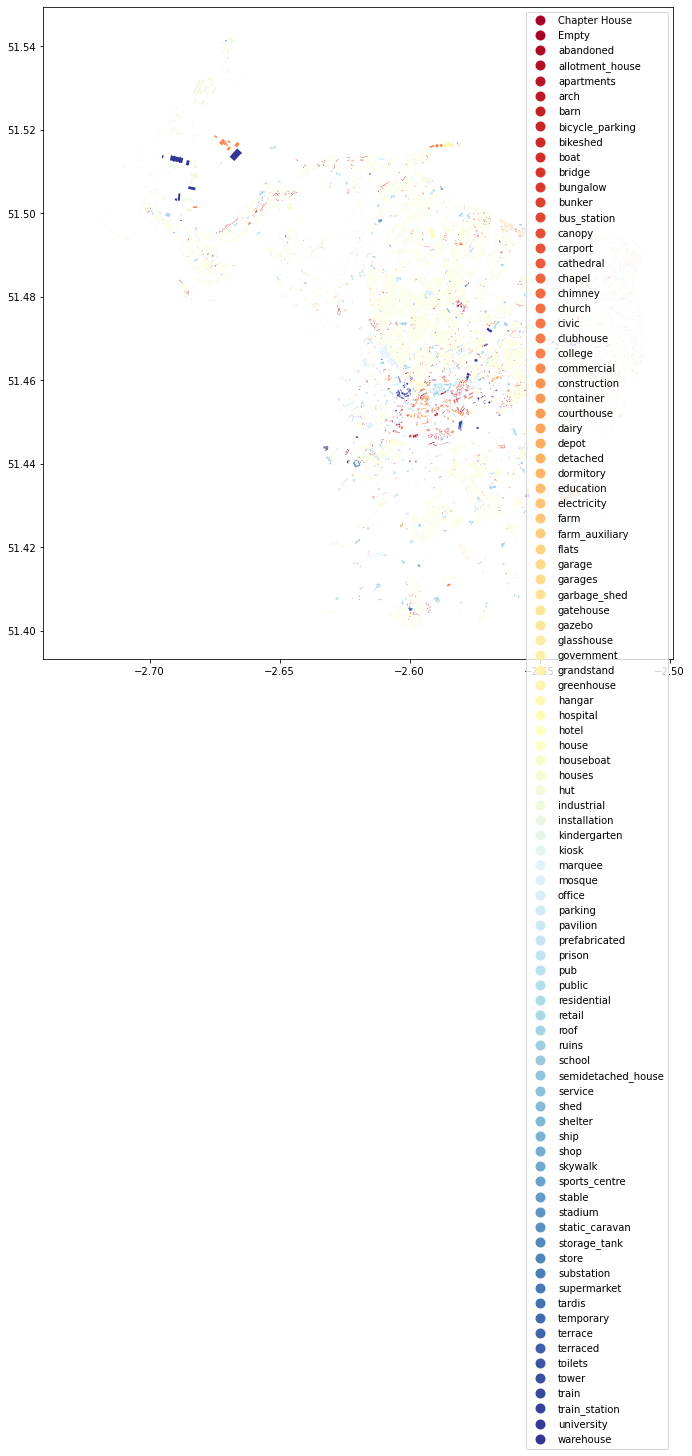

In [65]:
ax = bristol_building.plot(column="type", cmap="RdYlBu", figsize=(12,12), legend=True)

Here, we used the parameter `column` to specify the attribute that is used to specify the color for each building (can be categorical or continuous). We used `cmap` to specify the colormap for the categories and we added the legend by specifying `legend=True`. Note that since the type of buildings for Bristol is very diverse, we see a long list of lengend. There are ways to make it into two columns, for example. Can you explore it? Feel free to use Google search! 

Another issue is that the map is in a very large map scale. Next, we would like to zoom in a little bit. To do so, we can use `set_xlim()` and `set_ylim()` functions:

(51.44, 51.48)

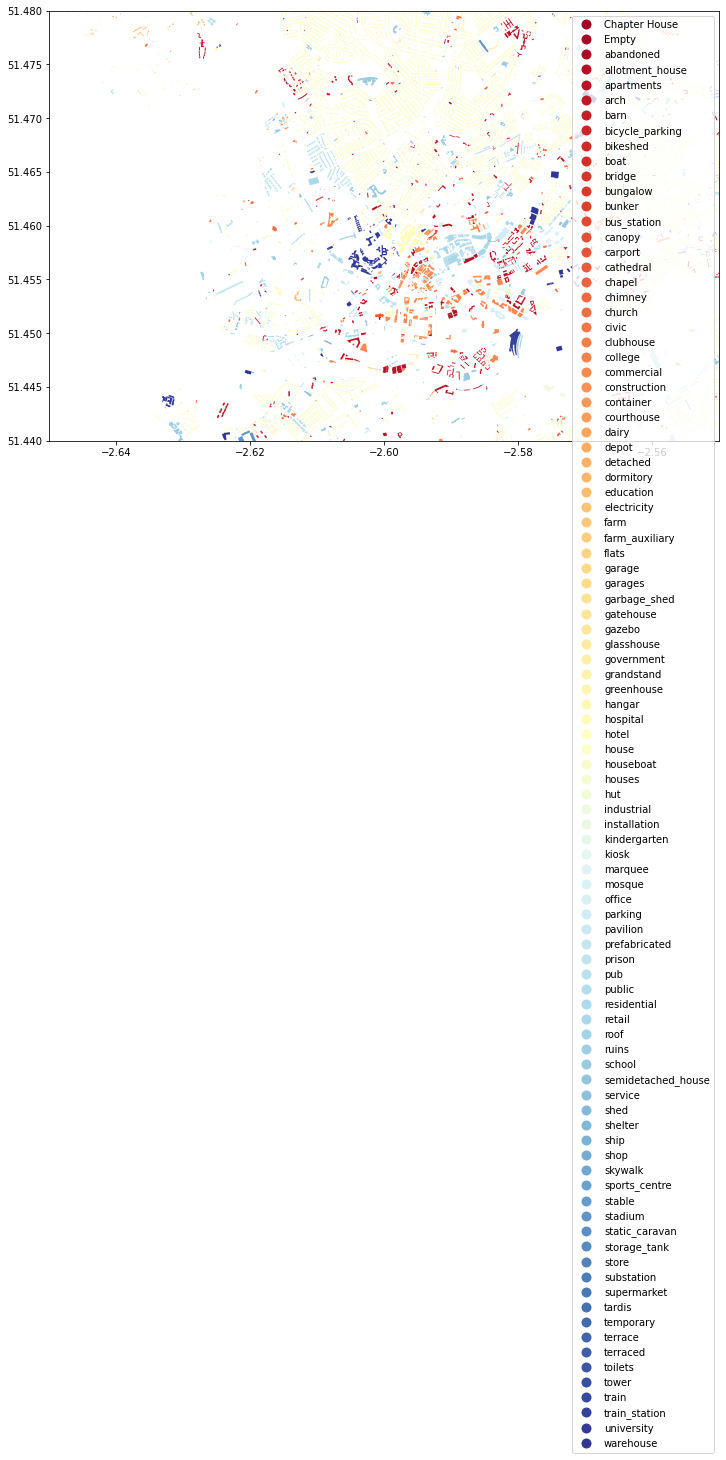

In [66]:
# Zoom into city center by specifying X and Y coordinate extent
# These values should be given in the units that our data is presented (here decimal degrees)
xmin, xmax = -2.65, -2.55
ymin, ymax = 51.44, 51.48

# Plot the map again
ax = bristol_building.plot(column="type", cmap="RdYlBu", figsize=(12,12), legend=True)

# Control and set the x and y limits for the axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

As you can see, we now zoomed in to the city center quite a lot. You can adjust the parameters yourself and test more! 

Meanwhile, you may wonder whether we can overlay multiple dataframes into the map? The answer is yes. Here is a sample code:

(51.44, 51.48)

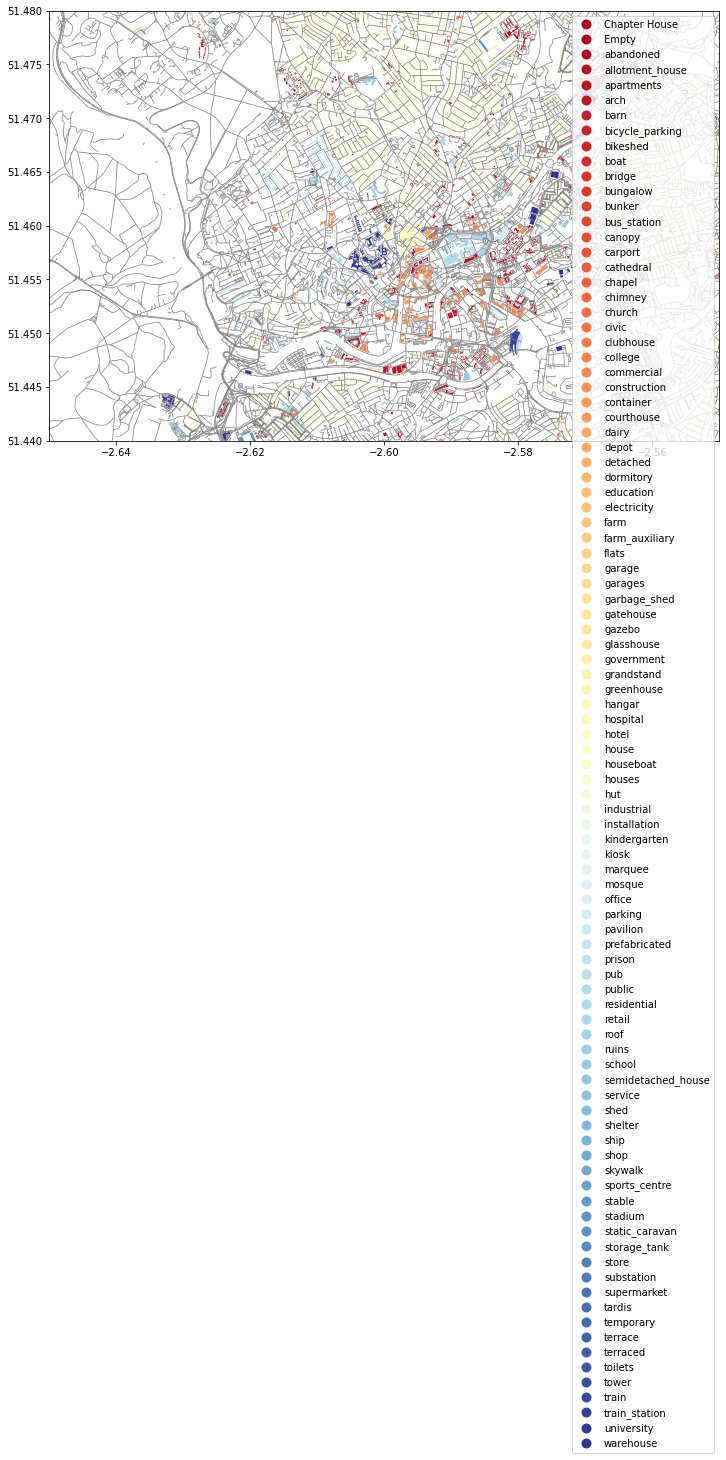

In [67]:
# Zoom into city center by specifying X and Y coordinate extent
# These values should be given in the units that our data is presented (here decimal degrees)
xmin, xmax = -2.65, -2.55
ymin, ymax = 51.44, 51.48

# Plot the map again
ax = bristol_building.plot(column="type", cmap="RdYlBu", figsize=(12,12), legend=True)

# Plot the roads into the same axis
ax = bristol_roadnetwork.plot(ax=ax, edgecolor="gray", linewidth=0.75)

# Control and set the x and y limits for the axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

Congrats! You have now finished the very first lab of using Python to process spatial data. I hope you enjoyed it and have seen the power of GeoPandas, and Python in general, for processing and studying spatial data. It is also worth highlighting that the functions introduced in this tutorial are selective. There are way more interesting and useful functions provided by these aforementioned packages. I highly recommended you to explore them by yourself. Learning never stops! 